In [2]:
import numpy as np
from matplotlib import pyplot as plt
import gym
import gym_ple
import cv2
import random
import os

def get_bird_point(cnts):
    max_num = 0
    res = (0, 0)
    for cnt in cnts:
        x = 0
        y = 0
        num = 0
        max_x = 0
        for point in cnt:
            x += point[0][0]
            y += point[0][1]
            num += 1
            if max_x < point[0][0]:
                max_x = point[0][0]
        if max_num < num and max_x < 120:
            max_num = num
            res = (int(x/num), int(y/num))
    if((res[0]==0 and res[1]==0) or max_num < 20):
        res = (100,350)
    return res


def cv_img2mat_img(img):
    img2 = np.zeros(np.shape(img),dtype='uint8')
    img2[:,:,0] = img[:,:,2]
    img2[:,:,1] = img[:,:,1]
    img2[:,:,2] = img[:,:,0]
    return img2

# 求灰度图像众数, uint8
def gray_img_data_mode(img_gray):
    w, h = np.shape(img_gray)
    data = np.reshape(img_gray, w*h)
    return np.argmax(np.bincount(data))

def color_img_data_mode(img):
    modes = []
    for c in range(3):
        img_c = img[:,:,c]
        w, h = np.shape(img_c)
        data = np.reshape(img_c, w*h)
        modes.append(np.argmax(np.bincount(data)))
    return modes

def get_feature_points(img):
    img = img[0:400, :, :]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    mode = gray_img_data_mode(img_gray)
    img_gray[img_gray[:,:] == mode] = 0


    img_bit = np.zeros(img_gray.shape).astype('uint8')
    img_bit[img_gray[:, :] > 0] = 1
    
    # 获取连通域
    image, cnts, hierarchy = cv2.findContours(img_bit, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bird_point = get_bird_point(cnts)
    bird_x = bird_point[0]
    row_sum = np.sum(img_bit, 0)
    obs_x = np.argmax(row_sum[bird_x:] > 200) + bird_x
    col_val = img_bit[:,obs_x]
    obs_y1 = np.argmax(col_val==0)
    obs_y2 = len(col_val) - np.argmax(col_val[::-1]==0)
    if(obs_y1==0 or obs_y2==400):
        obs_x = 280
        obs_y1=100
        obs_y2=300
    return np.array([bird_point[0],bird_point[1],obs_x,obs_y1,obs_x,obs_y2])

def get_feature_distances(img):
    b_x, b_y, o_x1, o_y1, o_x2, o_y2 = get_feature_points(img)
    return np.array([o_x1-b_x,o_y1-b_y,o_y2-b_y])
    

couldn't import doomish
Couldn't import doom


In [9]:
# saving image from angent

env = gym.make('FlappyBird-v0')
env.seed(0)
count = 0
for i in range(10):
    env.reset()
    # while True:
    for x in range(20):
        action = 1
        if random.random() < 0.01:
            action = 0
        img, _, done, _ = env.step(action)
        
        count += 1
        bgr = np.zeros(img.shape)
        bgr[:,:,0] = img[:,:,2]
        bgr[:,:,1] = img[:,:,1]
        bgr[:,:,2] = img[:,:,0]
        # cv2.imshow('image', bgr)
        # cv2.waitKey()
        cv2.imwrite('pngs/%d.png' % count, bgr)
        if done:
            break

In [1]:
# loading image from pngs/*.png
files = os.listdir('pngs')
R = 2
G = 1
B = 0
for f in files:
    name = str(f)
    if(name.endswith('.png')):
        img = cv2.imread('pngs/%s' % f)
        b_x, b_y, o_x1, o_y1, o_x2, o_y2 = get_feature_points(img)
        plt.subplot(1, 4, 1)
        plt.imshow(cv_img2mat_img(img))
        plt.plot([b_x],[b_y],'xk')
        plt.plot([o_x1],[o_y1],'og')
        plt.plot([o_x2],[o_y2],'ob')
        plt.show()
        print(get_feature_distances(img))

NameError: name 'os' is not defined

## 展示特征提取过程

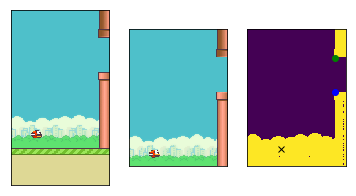

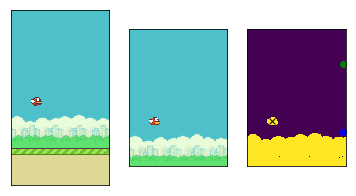

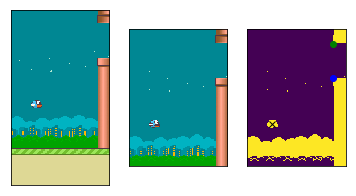

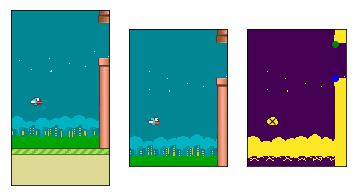

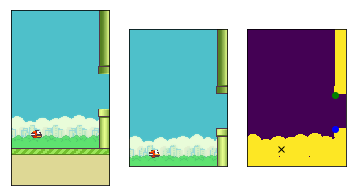

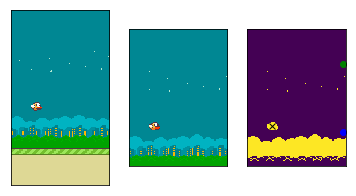

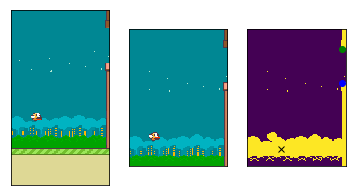

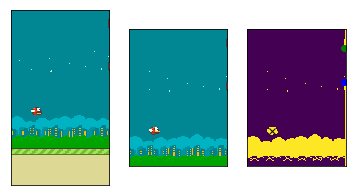

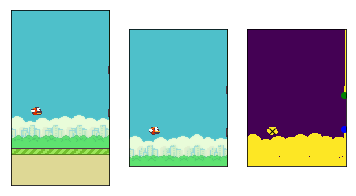

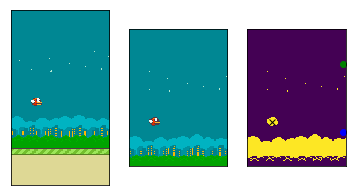

In [12]:

# loading image from pngs/*.png
files = os.listdir('pngs')

count = 0
for f in files:
    name = str(f)
    if(name.endswith('.png')):
        raw_img = cv2.imread('pngs/%s' % f)
        img = raw_img[0:400, :, :]
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        mode = gray_img_data_mode(img_gray)
        img_gray[img_gray[:,:] == mode] = 0


        img_bit = np.zeros(img_gray.shape).astype('uint8')
        img_bit[img_gray[:, :] > 0] = 1
        
        b_x, b_y, o_x1, o_y1, o_x2, o_y2 = get_feature_points(img)
        
        plt.subplot(1, 3, 1)
        plt.imshow(cv_img2mat_img(raw_img))
        plt.xticks([])
        plt.yticks([])
        plt.subplot(1, 3, 2)
        plt.imshow(cv_img2mat_img(img))
        plt.xticks([])
        plt.yticks([])
        plt.subplot(1, 3, 3)
        plt.imshow(img_bit)
        plt.xticks([])
        plt.yticks([])
        plt.plot([b_x],[b_y],'xk')
        plt.plot([o_x1],[o_y1],'og')
        plt.plot([o_x2],[o_y2],'ob')
        plt.show()
        count += 1
        if count==10:
            break